In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
physicians = pd.read_csv('physicians.csv')
physicians.head()

,id,specialty
0,0,General Surgery
1,1,Unknown
2,2,Family Practice
3,3,Emergency Medicine
4,4,Plastic and Reconstructive Surgery


In [4]:
physicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36025 entries, 0 to 36024
Data columns (total 2 columns):
id           36025 non-null int64
specialty    36025 non-null object
dtypes: int64(1), object(1)
memory usage: 563.0+ KB


In [5]:
physicians['specialty'].value_counts().head(10)

Unknown                  11092
Cardiology                8274
Internal Medicine         2925
Family Practice           2197
Emergency Medicine        1084
Anesthesiology            1058
Diagnostic Radiology       929
Obstetrics/Gynecology      724
Psychiatry                 681
Orthopedic Surgery         655
Name: specialty, dtype: int64

In [6]:
procedures = pd.read_csv('procedures.csv')
procedures.head()

,physician_id,procedure_code,procedure,number_of_patients
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,99212,established_patient_office_or_other_outpatient...,27
4,0,99213,established_patient_office_or_other_outpatient...,16


In [7]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587774 entries, 0 to 587773
Data columns (total 4 columns):
physician_id          587774 non-null int64
procedure_code        587774 non-null object
procedure             587774 non-null object
number_of_patients    587774 non-null int64
dtypes: int64(2), object(2)
memory usage: 17.9+ MB


In [8]:
physicians['specialty'].nunique()

71

In [9]:
procedures['physician_id'].nunique()

36025

In [10]:
physicians['id'].nunique()

36025

In [11]:
physproc = pd.merge(left=physicians,right=procedures,how='inner',left_on=['id'],right_on=['physician_id'])
physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16


In [12]:
known_physproc = physproc[physproc['specialty'] != 'Unknown']
known_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16


In [13]:
known_physproc['Cardiology'] = known_physproc['specialty'].apply(lambda s : 1 if s == 'Cardiology' else 0)

C:\Users\khiabaniy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
known_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients,Cardiology
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14,0
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15,0
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12,0
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27,0
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16,0


In [15]:
unknown_physproc = physproc[physproc['specialty'] == 'Unknown']
unknown_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
7,1,Unknown,1,76942,ultrasonic_guidance_imaging_supervision_and_in...,14
164,11,Unknown,11,00142,anesthesia_for_lens_surgery,29
165,11,Unknown,11,00400,"anesthesia_for_procedure_on_skin_of_arms,_legs...",18
166,11,Unknown,11,00520,anesthesia_for_closed_procedure_in_chest,16
167,11,Unknown,11,00740,anesthesia_for_procedure_on_gastrointestinal_t...,14


In [17]:
unknown_physproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181063 entries, 7 to 587773
Data columns (total 6 columns):
id                    181063 non-null int64
specialty             181063 non-null object
physician_id          181063 non-null int64
procedure_code        181063 non-null object
procedure             181063 non-null object
number_of_patients    181063 non-null int64
dtypes: int64(3), object(3)
memory usage: 9.7+ MB


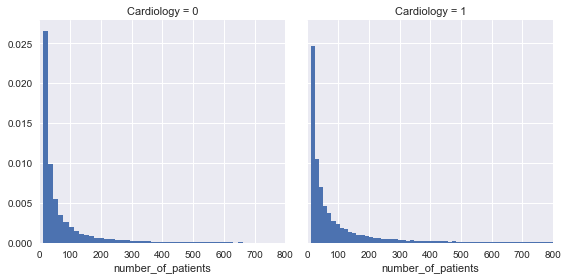

In [18]:
g = sns.FacetGrid(known_physproc,col='Cardiology',size=4, aspect=1,xlim=(0,800))
g.map(plt.hist,'number_of_patients',bins=500,normed=True)

In [19]:
known_physproc.groupby(['Cardiology'])['number_of_patients'].describe()

Cardiology       
0           count    216616.000000
            mean         72.799115
            std         129.687423
            min          11.000000
            25%          17.000000
            50%          32.000000
            75%          75.000000
            max        8372.000000
1           count    190095.000000
            mean        101.150220
            std         179.404042
            min          11.000000
            25%          20.000000
            50%          41.000000
            75%         106.000000
            max        6757.000000
Name: number_of_patients, dtype: float64

In [20]:
from nltk.corpus import stopwords

In [21]:
def text_process(mess):
    ListOfWords = mess.split('_')
    return [word for word in ListOfWords if word.lower() not in stopwords.words('english')]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [30]:
from sklearn.model_selection import train_test_split

procedure_train, procedure_test, label_train, label_test = \
train_test_split(known_physproc['procedure'], known_physproc['Cardiology'], test_size=0.3)

In [31]:
pipeline.fit(procedure_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000166ED207BF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [32]:
all_predictions = pipeline.predict(procedure_test)
print(all_predictions)

[0 1 0 ..., 0 0 0]


In [33]:
from sklearn.metrics import classification_report
print (classification_report(label_test, all_predictions))

             precision    recall  f1-score   support

          0       0.78      0.86      0.82     64802
          1       0.83      0.73      0.77     57212

avg / total       0.80      0.80      0.80    122014



In [34]:
application = unknown_physproc['procedure']
unknown_predictions = pipeline.predict(application)

In [48]:
total = len(unknown_predictions)
new_cardios = unknown_predictions.sum()

In [54]:
print("Number of carodiologists found is {} out of {}".format(new_cardios,total))

Number of carodiologists found is 74782 out of 181063


In [63]:
unknown_physproc['specialty'] = ['cardiology' if s == 1 else 'others' for s in unknown_predictions]

C:\Users\khiabaniy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
unknown_physproc.head(50)

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
7,1,others,1,76942,ultrasonic_guidance_imaging_supervision_and_in...,14
164,11,others,11,00142,anesthesia_for_lens_surgery,29
165,11,others,11,00400,"anesthesia_for_procedure_on_skin_of_arms,_legs...",18
166,11,others,11,00520,anesthesia_for_closed_procedure_in_chest,16
167,11,others,11,00740,anesthesia_for_procedure_on_gastrointestinal_t...,14
168,11,others,11,00810,anesthesia_for_procedure_on_lower_intestine_us...,39
169,11,others,11,00910,anesthesia_for_procedure_on_urinary_system_inc...,33
170,11,others,11,01214,anesthesia_for_open_total_hip_joint_replacement,11
171,11,others,11,01402,anesthesia_for_open_or_endoscopic_total_knee_j...,16
172,11,others,11,01630,anesthesia_for_open_or_endoscopic_procedure_at...,16
